In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
%matplotlib inline

In [2]:
! cat ../data/HPRICE1.DES

In [3]:
! cat ../data/SAVING.DES

In [7]:
data_path = "../data/"

header_hprice1 = ['price', 'assess', 'bdrms', 'lotsize', 'sqrft', 'colonial', 
                  'lprice', 'lassess', 'llotsize ', 'lsqrft']

header_saving = ['sav', 'inc', 'size', 'educ', 'age', 'black', 'cons']

df_hprice1 = pd.read_table(data_path + "/hprice1.raw", sep="\s+", header=None, names=header_hprice1)
df_saving = pd.read_table(data_path + "/saving.raw", sep="\s+", header=None, names=header_saving)

df_hprice1.head()
# df_saving.head()


,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.0,349.1,4,6126,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.0,351.5,3,9903,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.0,217.7,3,5200,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.0,231.8,3,4600,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.0,319.1,4,6095,2514,1,5.921578,5.765504,8.715224,7.829630


In [13]:
df_hprice1 = pd.concat([pd.Series(np.ones(df_hprice1.shape[0]), name='intercept'), 
                        df_hprice1.bdrms, df_hprice1.lotsize, df_hprice1.sqrft, df_hprice1.price], axis = 1)
df_hprice1.head()

,intercept,bdrms,lotsize,sqrft,price
0,1.0,4,6126,2438,300.0
1,1.0,3,9903,2076,370.0
2,1.0,3,5200,1374,191.0
3,1.0,3,4600,1448,195.0
4,1.0,4,6095,2514,373.0


In [26]:
X = df_hprice1[["intercept", "bdrms", "lotsize", "sqrft"]].values
y = df_hprice1.price.values

In [29]:
beta = (np.linalg.inv(X.T @ X)) @ X.T @ y
u = y - X @ beta

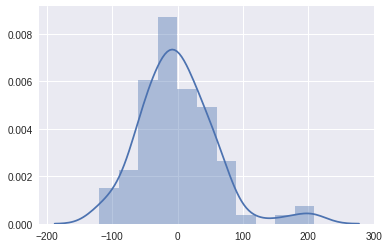

In [30]:
sns.distplot(u, kde=True)

In [33]:
# Test heteroschedasticity
u_2 = np.square(u)
beta_u_2 = (np.linalg.inv(X.T @ X)) @ X.T @ u_2

v = u_2 - X @ beta_u_2

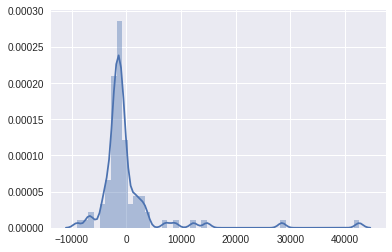

In [35]:
sns.distplot(v, kde=True)

In [39]:
SSR0 = v.T @ v
SSR0

3677520669.933414

In [49]:
# Model without variables
X_restricted = np.ones(df_hprice1.shape[0]).reshape([-1, 1])
beta_u_2_restricted = (np.linalg.inv(X_restricted.T @ X_restricted)) @ X_restricted.T @ u_2

beta_u_2_restricted
v_restricted = u_2 - X_restricted @ beta_u_2_restricted
SSR1 = v_restricted.T @ v_restricted
SSR1

4378734467.448066

In [55]:
# Compute F test
F = (SSR1 - SSR0) / (X.shape[1] - X_restricted.shape[1]) / (SSR0 / (X.shape[0] - X.shape[1]))
F

5.338919367859256

In [79]:
from scipy import stats
p = stats.f.ppf(0.95, dfd=(X.shape[0] - X.shape[1]), dfn=(X_restricted.shape[0] - X_restricted.shape[1]))
p

1.4311331864971506

In [80]:
F > p

True

In [50]:
SSR1 - SSR0

701213797.5146518

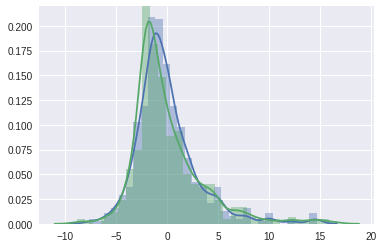

In [9]:
sns.distplot(u, kde=True)
# residuals approximately Gaussian => Important features are within model
sns.distplot(u_restricted, kde=True)

In [10]:
sig2 = u.T @ u / (n - k)
sig2_restricted = u_restricted.T @ u_restricted / (n - 2) 
#std = np.sqrt()
#std = np.sqrt(np.diag(sig2 * np.linalg.inv(X.T @ X)))
#std

In [11]:
F = ((sig2_restricted - sig2) / 2)/ (sig2/(n-k))

In [12]:
F

68.76404243751549

In [13]:
from scipy.stats import t

In [14]:
t.interval(0.90, n-k)

(-1.6477779439122966, 1.647777943912296)

In [17]:
df_wage1

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
5,8.75,16,9,8,0,0,1,0,1,0,...,0,0,0,1,1,0,0,2.169054,81,64
6,11.25,18,15,7,0,0,0,0,1,0,...,0,1,0,0,1,0,0,2.420368,225,49
7,5.00,12,5,3,0,1,0,0,1,0,...,0,0,0,0,1,0,0,1.609438,25,9
8,3.60,12,26,4,0,1,0,2,1,0,...,0,1,0,0,1,0,0,1.280934,676,16
9,18.18,17,22,21,0,0,1,0,1,0,...,0,0,0,0,1,0,0,2.900322,484,441


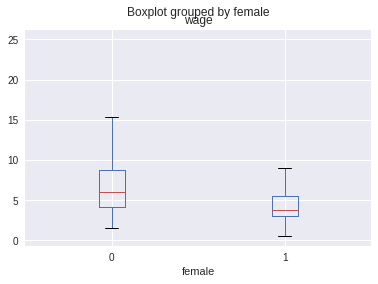

In [19]:
df_wage1.boxplot("wage", by="female")

NameError: name 'grs' is not defined